In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\datasets+minipro\EDV Projects\carvan_train.csv')

In [3]:
l=['MOSTYPE', 'MAANTHI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA',
       'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG',
       'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER',
       'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2',
       'MSKC', 'MSKD', 'MHHR', 'MHKOOP', 'MAT1', 'MAT2', 'MAT0',
       'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAT', 'PBESAT', 'PMOTSCO', 'PVRAAT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND',
       'APERSAT', 'ABESAT', 'AMOTSCO', 'AVRAAT', 'AAANHANG',
       'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG',
       'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED',
       'ABYSTAND', 'CARAVAN']

In [4]:
df.columns=l

In [5]:
pd.options.display.max_columns=None

In [6]:
df.describe()

,MOSTYPE,MAANTHI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHR,MHKOOP,MAT1,MAT2,MAT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAT,PBESAT,PMOTSCO,PVRAAT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAT,ABESAT,AMOTSCO,AVRAAT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973,0.522329,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,0.202679,3.784438,4.236345,0.771213,0.040021,0.071625,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859,0.018894,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,0.012539,0.033665,0.006183,0.070423,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073,1.056926,1.839675,1.730840,1.692843,1.722882,1.330664,1.529319,1.935568,1.303175,3.089302,3.089837,1.552799,1.203072,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829,0.551557,1.317783,2.007150,0.958623,0.362680,0.499980,2.920669,0.531346,0.897222,0.244675,0.212738,0.603076,0.228906,0.813133,0.898100,0.209260,0.192471,0.375274,1.879290,0.043462,0.273028,0.156894,0.20456,0.409016,0.492631,0.134133,0.142092,0.604767,0.129991,0.228974,0.062819,0.125775,0.240755,0.124189,0.265112,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [7]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i)

In [8]:
a=' '.join(map(str,(df.columns.tolist()))).lower()
col=a.split(' ')
df.columns=col

# Splitting X & y:

In [9]:
X=df.drop('caravan',1)
y=df['caravan']

In [10]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [11]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics


X=df.drop('caravan',1)
y=df['caravan']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =3)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier(n_estimators=17,random_state=0)
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
# gnb = GaussianNB()
# knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,n_estimators=2,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,n_estimators=21,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,n_estimators=29,random_state=0)
# bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0, n_estimators=17)
# xgb = XGBClassifier()

models=[lr,rf,adb,bgc,dt]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            y_test_pred_new=model.predict_proba(X_test)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(X_train,X_test, y_train, y_test)

ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Decistion Tree'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by=['auc_score','precision','recall'],ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall
0,Logistic Regression,0.775445,0.940368,0.940469,0.666667,0.019048
1,Ada boost,0.750902,0.940613,0.936463,0.285714,0.038095
2,Random Forest,0.669509,0.989448,0.924442,0.064516,0.019048
3,Bagging,0.629296,0.981595,0.925587,0.162162,0.057143
4,Decistion Tree,0.544861,0.993620,0.886090,0.126984,0.152381


In [12]:
df['caravan'].value_counts()

0    5474
1     348
Name: caravan, dtype: int64

In [34]:
## Note that precision,recall is sharply reduced due to imbalanced data.
## So,lets try with applying smote technique and see if any improvment is there in precision and recall!

## Lets try with oversampling technique SMOTE:

#### Here,We will try to increase minority samples to level of majority..This is called SMOTE(synthetic minority oversampling)technique.

In [13]:
from imblearn.over_sampling import SMOTE

smote_X=df.drop('caravan',axis=1)
smote_Y=df['caravan']
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =3)

# smote_X = telcom[cols]
# smote_Y = telcom[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 1)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=smote_X.columns)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=['caravan'])

In [14]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics


X=os_smote_X
y=os_smote_Y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =3)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier(n_estimators=17,random_state=0)
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
# gnb = GaussianNB()
# knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,n_estimators=2,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,n_estimators=21,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,n_estimators=29,random_state=0)
# bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0, n_estimators=17)
# xgb = XGBClassifier()

models=[lr,rf,adb,bgc,dt]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            y_test_pred_new=model.predict_proba(X_test)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(X_train,X_test, y_train, y_test)

ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Decistion Tree'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by=['auc_score','precision','recall'],ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall
0,Random Forest,0.986789,0.996516,0.956522,0.963964,0.949194
1,Bagging,0.982221,0.993033,0.949614,0.959638,0.939516
2,Ada boost,0.956247,0.891134,0.887444,0.878836,0.900806
3,Logistic Regression,0.927216,0.852813,0.846810,0.856907,0.835484
4,Decistion Tree,0.906241,0.997213,0.904510,0.899761,0.912097


In [15]:
X=os_smote_X
y=os_smote_Y

# Random Forest

##### Testing with cross validation using K Fold:

In [16]:
auc_avg = []
auc_var = []
for ne in np.arange(1,30):
    RF=RandomForestClassifier(n_estimators=ne,random_state=0)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    auc = cross_val_score(RF, X, y, cv=kfold, scoring='roc_auc')
    auc_avg.append(1 - np.mean(auc))
    auc_var.append(np.var(auc,ddof=1))

In [17]:
print('Bias Error:',auc_avg[np.argmin(auc_var)],' n_estimator:',np.argmin(auc_var)+1,'Min Variance Error:',np.min(auc_var))

Bias Error: 0.012235919515263816  n_estimator: 29 Min Variance Error: 5.580283819975646e-06


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=8)

In [19]:
RF=RandomForestClassifier(n_estimators=29)
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=29,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_prob_train = RF.predict_proba(X_train)
y_pred_train = RF.predict(X_train)
y_prob_test = RF.predict_proba(X_test)
y_prob_test=y_prob_test[:,1]
y_pred_test = RF.predict(X_test)

print('Confusion Matrix - Train:', '\n', confusion_matrix(y_train, y_pred_train))
print('Overall Accuracy', accuracy_score(y_train, y_pred_train))
print('Confusion Matrix - Test:', '\n', confusion_matrix(y_test, y_pred_test))
print('Overall Accuracy', accuracy_score(y_test, y_pred_test))
      
from sklearn.metrics import log_loss
print('log loss: ',log_loss(y_test,y_pred_test))
print('auc-roc score: ',metrics.roc_auc_score(y_test,y_prob_test))
print('precision score: ',metrics.precision_score(y_test,y_pred_test))
print('recall score: ',metrics.recall_score(y_test,y_pred_test))
print('F1 score: ',metrics.f1_score(y_test,y_pred_test))

Confusion Matrix - Train: 
 [[3245   10]
 [   7 3299]]
Overall Accuracy 0.9974089315653102
Confusion Matrix - Test: 
 [[807  39]
 [ 43 752]]
Overall Accuracy 0.9500304692260817
log loss:  1.7259054531885771
auc-roc score:  0.9889505925033825
precision score:  0.9506953223767383
recall score:  0.9459119496855346
F1 score:  0.9482976040353089


# Decision Tree

In [21]:
X=os_smote_X
y=os_smote_Y

In [22]:
dt = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10), 'min_samples_leaf':np.arange(2,15), 'criterion':['entropy','gini']}
gscv = GridSearchCV(dt, dt_params, cv=5, scoring='roc_auc')
gscv.fit(X, y)
print(gscv.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 11}


In [23]:
gscv_best_DT=gscv.best_params_
DT=DecisionTreeClassifier(**gscv_best_DT)
DT.fit(X,y)
DT.score(X,y)

0.8868568641794684

In [24]:
y_prob_train = DT.predict_proba(X_train)
y_pred_train = DT.predict(X_train)
y_prob_test = DT.predict_proba(X_test)
y_prob_test=y_prob_test[:,1]
y_pred_test = DT.predict(X_test)

print('Confusion Matrix - Train:', '\n', confusion_matrix(y_train, y_pred_train))
print('Overall Accuracy', accuracy_score(y_train, y_pred_train))
print('Confusion Matrix - Test:', '\n', confusion_matrix(y_test, y_pred_test))
print('Overall Accuracy', accuracy_score(y_test, y_pred_test))
      
from sklearn.metrics import log_loss
print('log loss: ',log_loss(y_test,y_pred_test))
print('auc-roc score: ',metrics.roc_auc_score(y_test,y_prob_test))
print('precision score: ',metrics.precision_score(y_test,y_pred_test))
print('recall score: ',metrics.recall_score(y_test,y_pred_test))
print('F1 score: ',metrics.f1_score(y_test,y_pred_test))

Confusion Matrix - Train: 
 [[2746  509]
 [ 234 3072]]
Overall Accuracy 0.8867550678250267
Confusion Matrix - Test: 
 [[716 130]
 [ 55 740]]
Overall Accuracy 0.8872638634978671
log loss:  3.8938315543719697
auc-roc score:  0.9457424505999374
precision score:  0.8505747126436781
recall score:  0.9308176100628931
F1 score:  0.888888888888889


In [25]:
# from sklearn.tree import plot_tree,export_text
# plt.figure(figsize=(8,6))
# plot_tree(DT)
# plt.show()

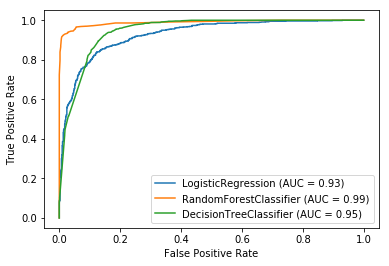

In [26]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(RF,X_test,y_test,ax=disp.ax_)
plot_roc_curve(DT,X_test,y_test,ax=disp.ax_)
plt.show()

In [40]:
dfte=pd.read_csv('D:\datasets+minipro\EDV Projects\carvan_test.csv')

In [41]:
l=['MOSTYPE', 'MAANTHI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA',
       'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG',
       'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER',
       'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2',
       'MSKC', 'MSKD', 'MHHR', 'MHKOOP', 'MAT1', 'MAT2', 'MAT0',
       'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAT', 'PBESAT', 'PMOTSCO', 'PVRAAT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND',
       'APERSAT', 'ABESAT', 'AMOTSCO', 'AVRAAT', 'AAANHANG',
       'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG',
       'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED',
       'ABYSTAND']

In [42]:
b=' '.join(map(str,(df.columns.tolist()))).lower()
col=a.split(' ')
dfte.columns=col[:-1]

In [43]:
X=os_smote_X
y=os_smote_Y

In [44]:
RF=RandomForestClassifier(n_estimators=29)
RF.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=29,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
y_pred_rf=pd.DataFrame(RF.predict(dfte),columns=['predictions'])

In [58]:
y_pred_rf['predictions'].value_counts()

0    3842
1     158
Name: predictions, dtype: int64

In [67]:
y_pred_rf.to_csv('D:\datasets+minipro\EDV Projects\caravansub.csv',columns=['predictions'],index=None)

In [72]:
for i in dfte.columns:
    if dfte[i].isnull().sum()>0:
        print(i)